# Quickhire

## Vector Representations

- 1. Clean: Job Listings from current database:
- 2. Spacy to tokenize the listings
- 3. Scikit-Learn's CountVectorizer to get word counts for each listing.
- 4. Visualize the most common word counts
- 5. Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix
- 6. Created a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings.

In [5]:
""" Import Statements """

# Classics
import pandas as pd
import numpy as np

# Base
from collections import Counter
import re
import string

# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# NLP Libraries
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()

## 1. Clean: Job Listings from current database:

In [40]:
pwd

'/Users/jorge/quickhire'

In [65]:
ls

Data/                    quickhire_dev_1.1.ipynb


In [6]:
df = pd.read_csv("data/job_listings1.2.csv")
# replace blank flavor with ""
df = df.replace(np.nan, '', regex=True)
df.replace("?", np.NaN)
print(df.shape)
df.head(3)

(118782, 20)


,Unnamed: 0,post_date_utc,pay_min,pay_max,pay_exact,title,seniority,job_id,description_x,company_id,keyphrase,location_id,name,description_y,size,revenue,logo_url,city,state_province,country
0,0,2020-01-31 21:55:07.257399+00:00,30000,100000,89000,software dev,junior,1,job 1 this is a great place to work,1,"java, ruby",1,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA
1,1,2020-01-31 21:55:07.257399+00:00,30000,100000,89000,software dev,junior,4,job 4 this is a great place to work,1,,1,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA
2,2,2020-02-04 18:27:17+00:00,,,,Research Software Engineer,,2034,**Introduction**\n \nIBM Research Scientists ...,1,,835,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA


In [8]:
df.describe(exclude='number')

,post_date_utc,pay_min,pay_max,pay_exact,title,seniority,job_id,description_x,company_id,keyphrase,location_id,name,description_y,size,revenue,logo_url,city,state_province,country
count,118782,118782,118782,118782,118782,118782,118782,118782,118782.0,118782,118782.0,118782,118782,118782,118782,118782,118782,118782,118782
unique,117832,4,4,4,82580,4,117915,113862,19678.0,2,8124.0,19927,1568,4,4,2440,7445,212,16
top,,,,,,,,,41.0,,720.0,CyberCoders,,,,,,,US
freq,868,118776,118776,118776,868,118776,868,868,2897.0,118779,4426.0,2897,83601,118386,118386,78948,22024,26758,77352


In [9]:
df.dtypes

Unnamed: 0         int64
post_date_utc     object
pay_min           object
pay_max           object
pay_exact         object
title             object
seniority         object
job_id            object
description_x     object
company_id        object
keyphrase         object
location_id       object
name              object
description_y     object
size              object
revenue           object
logo_url          object
city              object
state_province    object
country           object
dtype: object

In [10]:
df['description_x'][0:]

0                       job 1 this is a great place to work
1                       job 4 this is a great place to work
2         **Introduction**\n  \nIBM Research Scientists ...
3         **Introduction**\n  \nSoftware Developers at I...
4         **Introduction**\n  \nSoftware Developers at I...
5         **Introduction**\n  \nSoftware Developers at I...
6         **Introduction**\n  \nIBM Research Scientists ...
7         User Experience Design Lead, IBM Corporation, ...
8         Software Developer, IBM Corporation, Littleton...
9         **Introduction**  \n\nSoftware Developers at I...
10        **Introduction**  \n\nSoftware Developers at I...
11        **Introduction**  \n\nAt IBM, work is more tha...
12        Introduction   \n\nSoftware Developers at IBM ...
13        Introduction\n\nAt IBM, work is more than a jo...
14        Introduction   \n\nSoftware Developers at IBM ...
15        Introduction   \n\nIBM Global Business Service...
16        Introduction\n\nSoftware Devel

In [11]:
# df['description_x'].head()

df['description_x'] = df['description_x'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df['description_x'] = df['description_x'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')
df['description_x'] = df['description_x'].str.replace('/', ' ')
df['description_x'] = df['description_x'].str.replace(r"\s+", " ")
df['description_x'] = df['description_x'].str.replace('/\d\.\s+|[a-z]\)\s+|•\s+|[A-Z]\.\s+|[IVX]+\.\s+/g', "")

In [12]:
df['description_x']= df['description_x'].astype(str)

In [13]:
def punct_cleaning(column):
    processed_data = []
    for i in column:
        text = re.sub('[%s]' % string.punctuation, '', i).lower()
        processed_data.append(text)
    return pd.DataFrame(processed_data)

In [14]:
df['description_x'] = punct_cleaning(df['description_x'])
df['description_x'][10]

'introduction software developers at ibm are the backbone of our strategic initiatives to design code test and provide industryleading solutions that make the world run today  planes and trains take off on time bank transactions complete in the blink of an eye and the world remains safe because of the work our software developers do whether you are working on projects internally or for a client software development is critical to the success of ibm and our clients worldwide at ibm you will use the latest software development tools techniques and approaches and work with leading minds in the industry to build solutions you can be proud of your role and responsibilities start dates for this position are in summer 2020 3 months as a front end developer intern have passion and experience for building responsive elegant and engaging experiences with future friendly web technologies work closely with designers to take wireframes from conception to implementation and design and improve user i

## 2. Use Spacy to tokenize the listings:

In [15]:
nlp = spacy.load('en_core_web_lg')

In [16]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [17]:
#Tokenizer Pipe

tokens = []

# Make the tokens
for doc in nlp.pipe(df['description_x'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
           doc_tokens.append(token.text)
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [18]:
df['tokens'].head()

0                         [job, 1, great, place, work]
1                         [job, 4, great, place, work]
2    [introduction, ibm, research, scientists, char...
3    [introduction, software, developers, ibm, back...
4    [introduction, software, developers, ibm, back...
Name: tokens, dtype: object

In [19]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['description_x'].apply(get_lemmas)

In [20]:
print(df.shape)
df.head()

(118782, 22)


,Unnamed: 0,post_date_utc,pay_min,pay_max,pay_exact,title,seniority,job_id,description_x,company_id,...,name,description_y,size,revenue,logo_url,city,state_province,country,tokens,lemmas
0,0,2020-01-31 21:55:07.257399+00:00,30000,100000,89000,software dev,junior,1,job 1 this is a great place to work,1,...,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA,"[job, 1, great, place, work]","[job, 1, great, place, work]"
1,1,2020-01-31 21:55:07.257399+00:00,30000,100000,89000,software dev,junior,4,job 4 this is a great place to work,1,...,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA,"[job, 4, great, place, work]","[job, 4, great, place, work]"
2,2,2020-02-04 18:27:17+00:00,,,,Research Software Engineer,,2034,introduction ibm research scientists are chart...,1,...,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA,"[introduction, ibm, research, scientists, char...","[introduction, ibm, research, scientist, chart..."
3,3,2020-02-04 20:00:45+00:00,,,,2020 Intern - Back End Developer,,2473,introduction software developers at ibm are th...,1,...,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA,"[introduction, software, developers, ibm, back...","[introduction, software, developer, ibm, backb..."
4,4,2020-02-04 20:01:52+00:00,,,,Entry Level - Back End Developer,,2493,introduction software developers at ibm are th...,1,...,IBM,IBM is the largest technology and consulting e...,500000,7.9e+10,https://coda.newjobs.com/api/imagesproxy/ms/mm...,oakland,california,USA,"[introduction, software, developers, ibm, back...","[introduction, software, developer, ibm, backb..."


## 3. Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [21]:
# create the transformer:
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['description_x'])

# Get sparse dtm
dtm = vect.transform(df['description_x'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,00,000,0000,00000,0000000,00000119,00000262,00000444,00000759,0000092262,...,ﬁeld,ﬁelds,ﬁnger,ﬁrm,ﬁrms,ﬁrst,ﬁt,ﬂow,ﬂowcharts,ﾠall
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dtm.shape

(118782, 316139)

## 4) Visualize the most common word counts

In [25]:
doc_len = [len(doc) for doc in df]

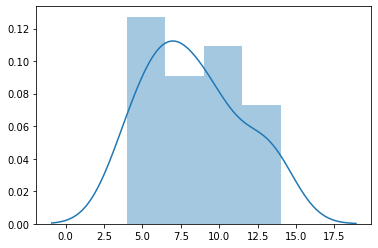

In [26]:
sns.distplot(doc_len)
plt.show()

In [27]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [28]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,place,9669,-9223372036854775808,NaN,-inf,-inf,0.081401
1,job,64575,-9223372036854775808,NaN,-inf,-inf,0.543643
2,work,93409,-9223372036854775808,NaN,-inf,-inf,0.786390
3,1,17301,-9223372036854775808,NaN,-inf,-inf,0.145653
4,great,16831,-9223372036854775808,NaN,-inf,-inf,0.141697


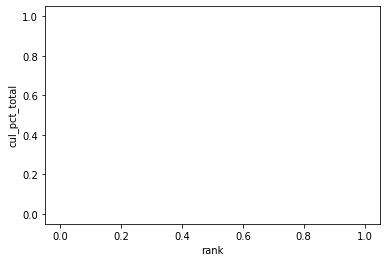

In [29]:
# cumlative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

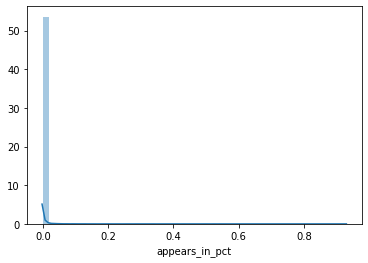

In [30]:
# Frequency of apperances
sns.distplot(wc['appears_in_pct'])
plt.show()

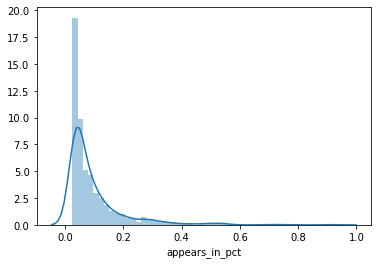

In [31]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct'])
plt.show()

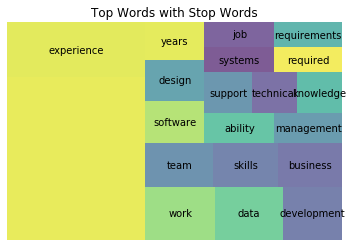

In [32]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.title('Top Words with Stop Words')
plt.axis('off')
plt.show()

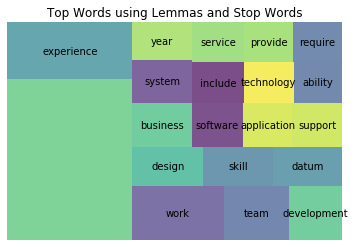

In [33]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.title('Top Words using Lemmas and Stop Words')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [1]:
# instantiate vectorizer object:
tfidf = TfidfVectorizer(max_df=.97,
                        min_df=3,
                        stop_words='english')

# create a vocabulary and get word counts per document:
dtm_tfidf = tfidf.fit_transform(df['description_x'])

# print word counts

# get feature names to use as dataframe column headers:
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# view Feature Matrix as DataFrame:
dtm_tfidf.head()

NameError: name 'TfidfVectorizer' is not defined